In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
#instead of merge directly, I group ride_data by city and calculater average fare and ride count before merging
ride_city = ride_data.groupby("city")
city_ave_fare = pd.DataFrame(ride_city["fare"].mean()).reset_index()
city_ride_count = pd.DataFrame(ride_city["ride_id"].count()).reset_index()
combine_data = pd.merge(city_data,city_ave_fare, on="city")
combine_data = pd.merge(combine_data,city_ride_count, on="city")
combine_data=combine_data.rename(columns={"fare" : "Average Fare", "ride_id":"Ride Count"})
# Display the data table for preview
combine_data.head()



,city,driver_count,type,Average Fare,Ride Count
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


## Bubble Plot of Ride Sharing Data

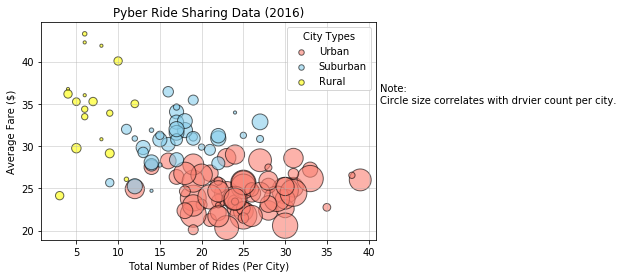

In [13]:
# Obtain the x and y coordinates for each of the three city types
urban_data = combine_data[combine_data["type"]=="Urban"]
suburban_data = combine_data[combine_data["type"]=="Suburban"]
rural_data = combine_data[combine_data["type"]=="Rural"]

urban_average_fare = urban_data["Average Fare"]
urban_total_ride = urban_data["Ride Count"]
urban_driver = urban_data["driver_count"]

suburban_average_fare = suburban_data["Average Fare"]
suburban_total_ride = suburban_data["Ride Count"]
suburban_driver = suburban_data["driver_count"]

rural_average_fare = rural_data["Average Fare"]
rural_total_ride = rural_data["Ride Count"]
rural_driver = rural_data["driver_count"]

# Build the scatter plots for each city types: 
#size of "bubble" is decided by driver count in each city. I enlarge it by 10 times.
    
urban=plt.scatter(urban_total_ride,urban_average_fare,marker="o", facecolors="salmon", edgecolors="black",label="Urban", s=urban_driver*10, alpha=0.6)
suburban=plt.scatter(suburban_total_ride,suburban_average_fare,marker="o", facecolors="skyblue", edgecolors="black",label="Suburban",s =suburban_driver*10, alpha=0.6)
rural=plt.scatter(rural_total_ride,rural_average_fare,marker="o", facecolors="yellow", edgecolors="black",label="Rural",s =rural_driver*10,alpha=0.6)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(alpha = 0.5)

# Create a legend & set handle size to the same size (I googled it)
lgd = plt.legend(handles=[urban, suburban,rural], title="City Types", loc="best")
for handle in lgd.legendHandles:
    handle.set_sizes([30.0])
# Incorporate a text label regarding circle size (I googled it)
plt.text(0.91,0.6,"Note:\nCircle size correlates with drvier count per city.",transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("image/Pyber_Ride_Sharing_Data(2016).png",bbox_inches = "tight")

In [14]:
# Show plot
plt.show()

## Total Fares by City Type

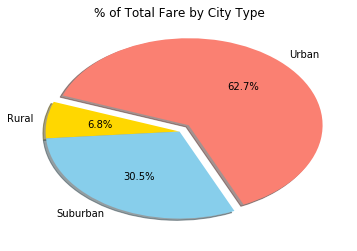

In [15]:
# Calculate Type Percents
combine_ride = pd.merge(ride_data,city_data,on="city")
city_gp = combine_ride.groupby("type")
fare_type = pd.DataFrame(city_gp["fare"].sum()).reset_index()

# Build Pie Chart
color=["gold","skyblue","salmon"]
fare_pie = plt.pie(fare_type["fare"],explode=(0,0,0.1),labels=fare_type["type"],colors=color,autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Fare by City Type")
# Save Figure
plt.savefig("image/Total_Fare_by_City_Type",bbox_inches = "tight")

In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

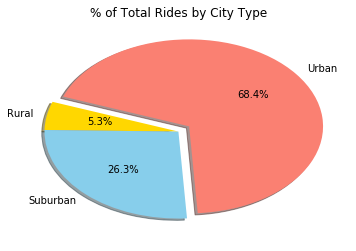

In [17]:
# Calculate Ride Percents
combine_data_ridecount_gp = combine_data.groupby("type")
ride_count_df = pd.DataFrame(combine_data_ridecount_gp["Ride Count"].sum()).reset_index()

# Build Pie Chart
ride_count_pie = plt.pie(ride_count_df["Ride Count"],explode=(0,0,0.1),labels=ride_count_df["type"],colors=color,autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("image/Total_Ride_by_City_Type",bbox_inches = "tight")

In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

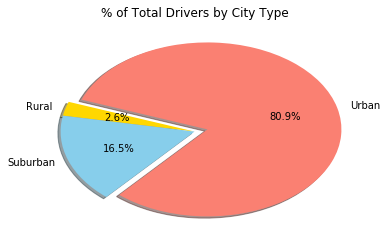

In [19]:
# Calculate Driver Percents
driver_count_df = pd.DataFrame(combine_data_ridecount_gp["driver_count"].sum()).reset_index()

# Build Pie Charts
driver_count_pie = plt.pie(driver_count_df["driver_count"],explode=(0,0,0.1),labels=driver_count_df["type"],colors=color,autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("image/Total_Drivers_by_City_Type",bbox_inches = "tight")

In [ ]:
# Show Figure
plt.show()